<a href="https://colab.research.google.com/github/GloryTrizza/SQL-Chicago-Crime-Data/blob/main/working_with_real_world_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('working-with-real-world-datasets-using-sql-python-and-ibm-bd2-on-cloud')
jovian.set_colab_id('1eirbsYS6W8qiDvm0c8UnU2huAbYhw25l')

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="700" alt="cognitiveclass.ai logo"  />
</center>

# WORKING WITH REAL WORLD DATASETS USING SQL, PYTHON & IBM-Db2 ON CLOUD 

---

**`Db2 on Cloud` is a `Relational Database Management System` others being my SQL, Oracle Database,SQL Server,Postgress SQL, HSQL, SQLite, DB2 Warehouse.Prior to running this notebook, create a database service instance of Db2 on Cloud and retrieve your database Service Credentials.**

# `Instructions`

**You will be working on a real world dataset provided by the Chicago Data Portal. Imagine, you have been hired by a non-profit organization that strives to improve educational outcomes for children and youth in the City of Chicago. Your job is to analyze the census, crime, and school data for a given neighborhood or district. You will identify causes that impact the enrollment, safety, health, environment ratings of schools.You will be asked questions that will help you understand the data just like a data analyst or data scientist would.**

`You will download the datasets, load them into a database, write and execute SQL queries to answer the problems provided`

## `3 datasets for the city of Chicago obtained from the Chicago Data Portal:`
1. **Chicago Socioeconomic Indicators**

**This [dataset](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01) contains a selection of six socioeconomic indicators of public health significance and a hardship index, by Chicago community area, for the years 2008 – 2012.**

2. **Chicago Public Schools**

**This [dataset](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01) shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year.**

3. **Chicago Crime Data**

**This [dataset](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01) reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.**

**`NOTE`** 

**We used subsets of the original datasets and have some of the column names modified to be more database friendly which will make it easier to query. The CSV file used for the Chicago Crime Data is a very small subset of the full dataset available from the Chicago Data Portal. The original dataset is over 1.55GB in size and contains over 6.5 million rows. Due to some limitations with the IBM DB2 LITE plan, we will use a much smaller sample with only about 500 rows.**


## `TABLE OF CONTENT`

1. **Connecting the database**
2. **Checking the contents of the Tables loaded on the Db2 database**
3. **Problems**

## `1.Connect to the database`

---

`SQL "magic" provided by the ipython-sql extension to communicate with SQL Databases from within a JupyterLab notebook helps to run the cell as SQL statements`

**Let us now load the ipython-sql extension and establish a connection with the database**

In [ ]:
!pip install ipython-sql
!pip install sqlalchemy==1.3.9 # database toolkit for python 
!pip install ibm_db
!pip install ibm_db_sa # The IBM_DB_SA adapter provides the Python/SQLAlchemy interface to IBM Data Servers.


import ibm_db
import ibm_db_sa
import sqlalchemy

%load_ext sql

In [ ]:
%sql ibm_db_sa://zfr48905:pnc862bt%5E7vhf2zg@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB

DB2/LINUXX8664


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**If you face any error while imorting the libraries, install the libraries first and then import.**

---

## `2. WALK THROUGH THE TABLES CONTENT`

##### The CHICAGO_CRIME_DATA table contains a large number of columns. How many columns does this table have?

In [ ]:
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'CHICAGO_CRIME_DATA'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
21


In [ ]:
%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'CHICAGO_CRIME_DATA'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name,coltype,length
ARREST,VARCHAR,5
BEAT,SMALLINT,2
BLOCK,VARCHAR,35
CASE_NUMBER,VARCHAR,8
COMMUNITY_AREA_NUMBER,SMALLINT,2
DATE,DATE,4
DESCRIPTION,VARCHAR,46
DISTRICT,SMALLINT,2
DOMESTIC,VARCHAR,5
FBICODE,VARCHAR,3


In [ ]:
%sql select * FROM CHICAGO_CRIME_DATA LIMIT 5

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,latitude,longitude,location
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"


##### The CHICAGO_PUBLIC_SCHOOLS table contains a large number of columns. How many columns does this table have?

In [ ]:
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'CHICAGO_PUBLIC_SCHOOLS'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
78


In [ ]:
%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'CHICAGO_PUBLIC_SCHOOLS'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name,coltype,length
10th Grade PLAN (2009),VARCHAR,4
10th Grade PLAN (2010),VARCHAR,4
11th Grade Average ACT (2011),VARCHAR,4
9th Grade EXPLORE (2009),VARCHAR,4
9th Grade EXPLORE (2010),VARCHAR,4
AVERAGE_STUDENT_ATTENDANCE,VARCHAR,6
Adequate_Yearly_Progress_Made_,VARCHAR,3
Average_Teacher_Attendance,VARCHAR,6
COLLEGE_ENROLLMENT,SMALLINT,2
COMMUNITY_AREA_NAME,VARCHAR,22


In [ ]:
%sql select * FROM CHICAGO_PUBLIC_SCHOOLS LIMIT 5

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


School_ID,name_of_school,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,healthy_school_certified,Safety_Icon,safety_score,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,average_student_attendance,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,college_enrollment,General_Services_Route,Freshman_on_Track_Rate__,x_coordinate,y_coordinate,Latitude,Longitude,community_area_number,community_area_name,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99,Very Strong,99,Strong,74,Strong,66,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54,Strong,66,Strong,74,Very Strong,84,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61,NDA,NDA,Average,50,Weak,36,Weak,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609993.pdf,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56,Average,44,Average,45,Weak,37,Weak,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,N

##### The CENSUS_DATA table contains a large number of columns. How many columns does this table have?

In [ ]:
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'CENSUS_DATA'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
9


In [ ]:
%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'CENSUS_DATA'

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name,coltype,length
COMMUNITY_AREA_NAME,VARCHAR,22
COMMUNITY_AREA_NUMBER,SMALLINT,2
HARDSHIP_INDEX,SMALLINT,2
PERCENT_AGED_16__UNEMPLOYED,DECIMAL,4
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,DECIMAL,4
PERCENT_AGED_UNDER_18_OR_OVER_64,DECIMAL,4
PERCENT_HOUSEHOLDS_BELOW_POVERTY,DECIMAL,4
PERCENT_OF_HOUSING_CROWDED,DECIMAL,4
PER_CAPITA_INCOME,INTEGER,4


In [ ]:
%%sql
select * FROM CENSUS_DATA LIMIT 5

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


---

# `3.PROBLEMS`

---

### Problem 1

##### `How many Elementary Schools are in the dataset?`

In [ ]:
%%sql
SELECT COUNT(*) AS NUMBER_OF_ELEMENTARY_SCHOOLS
FROM CHICAGO_PUBLIC_SCHOOLS
WHERE "Elementary, Middle, or High School" = 'ES' ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


number_of_elementary_schools
462


### Problem 2

##### `What is the highest Safety Score?`

In [ ]:
%%sql
SELECT MAX(SAFETY_SCORE) 
FROM CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
99


### Problem 3

##### `Which schools have highest Safety Score?`

In [ ]:
%%sql
SELECT NAME_OF_SCHOOL, SAFETY_SCORE
FROM CHICAGO_PUBLIC_SCHOOLS
WHERE SAFETY_SCORE = (SELECT MAX(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS);

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


### Problem 4

##### `What are the top 10 schools with the highest "Average Student Attendance"?`

In [ ]:
%%sql
SELECT NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOLS
ORDER BY AVERAGE_STUDENT_ATTENDANCE DESC 
NULLS LAST 
LIMIT 10 ;


 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


### Problem 5

##### `Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance`

In [ ]:
%%sql
SELECT NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOLS
ORDER BY AVERAGE_STUDENT_ATTENDANCE
NULLS LAST
LIMIT 5 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


### Problem 6

##### `Now remove the '%' sign from the above result set for Average Student Attendance column`


In [ ]:
%%sql
SELECT NAME_OF_SCHOOL,REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%','') AS AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOLS 
ORDER BY AVERAGE_STUDENT_ATTENDANCE
NULLS LAST
LIMIT 5 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


### Problem 7

##### `Which Schools have Average Student Attendance lower than 70%?`

In [ ]:
%%sql
SELECT NAME_OF_SCHOOL, REPLACE(AVERAGE_STUDENT_ATTENDANCE,'%','') AS AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOLS
WHERE DECIMAL(REPLACE(AVERAGE_STUDENT_ATTENDANCE,'%','')) < 70
ORDER BY AVERAGE_STUDENT_ATTENDANCE;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30
Manley Career Academy High School,66.80
Chicago Vocational Career Academy High School,68.80
Roberto Clemente Community Academy High School,69.60


### Problem 8

##### `Get the total College Enrollment for each Community Area`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS COLLEGE_ENROLLMENT
FROM CHICAGO_PUBLIC_SCHOOLS
GROUP BY COMMUNITY_AREA_NAME;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,college_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


### Problem 9

##### `Get the 5 Community Areas with the least College Enrollment  sorted in ascending order`


In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) AS COLLEGE_ENROLLMENT
FROM CHICAGO_PUBLIC_SCHOOLS
GROUP BY COMMUNITY_AREA_NAME
ORDER BY COLLEGE_ENROLLMENT ASC
NULLS LAST
LIMIT 5;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,college_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


### Problem 10

##### `List 5 schools with lowest safety score.`

In [ ]:
%%sql
SELECT NAME_OF_SCHOOL, SAFETY_SCORE
FROM CHICAGO_PUBLIC_SCHOOLS
ORDER BY SAFETY_SCORE
NULLS LAST
LIMIT 5 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Edmond Burke Elementary School,1
Luke O'Toole Elementary School,5
George W Tilton Elementary School,6
Foster Park Elementary School,11
Emil G Hirsch Metropolitan High School,13


### Problem 11

##### `Get the hardship index for the community area which has College Enrollment of 4368`

In [ ]:
%%sql
SELECT community_area_name, HARDSHIP_INDEX
FROM CENSUS_DATA
WHERE community_area_number  = (SELECT community_area_number FROM CHICAGO_PUBLIC_SCHOOLS WHERE COLLEGE_ENROLLMENT = 4368 )

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,hardship_index
North Center,6


### Problem 12

##### `Get the hardship index for the community area which has the school with the  highest enrollment.`

In [ ]:
%%sql
SELECT community_area_name, HARDSHIP_INDEX
FROM CENSUS_DATA
WHERE community_area_number  = (SELECT community_area_number 
                                FROM CHICAGO_PUBLIC_SCHOOLS 
                                WHERE COLLEGE_ENROLLMENT = (SELECT MAX(COLLEGE_ENROLLMENT) FROM CHICAGO_PUBLIC_SCHOOLS) );

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,hardship_index
North Center,6


### Problem 13

##### `How many community areas in Chicago have a hardship index greater than 50.0?`

In [ ]:
%%sql
SELECT COUNT(COMMUNITY_AREA_NAME) AS NUMBER_OF_COMMUNITY_AREA
FROM CENSUS_DATA
WHERE HARDSHIP_INDEX > 50.0 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


number_of_community_area
38


### Problem 14

##### `What is the maximum value of hardship index in this dataset?`


In [ ]:
%%sql
SELECT MAX(HARDSHIP_INDEX) AS MAX_HARDSHIP_INDEX
FROM CENSUS_DATA;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


max_hardship_index
98


### Problem 15

##### `Which community area which has the highest hardship index?`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME,HARDSHIP_INDEX
FROM CENSUS_DATA
WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) 
                        FROM CENSUS_DATA) ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,hardship_index
Riverdale,98


### Problem 16

##### `Which Chicago community areas have per-capita incomes greater than $60,000?`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
FROM CENSUS_DATA
WHERE PER_CAPITA_INCOME > 60000 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


### Problem 17

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


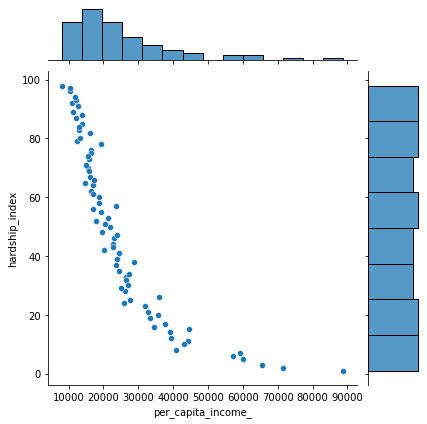

In [ ]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

### Problem 18

##### `Find the total number of crimes recorded in the CRIME table.`

In [ ]:
%%sql
SELECT COUNT(*)AS NUMBER_OF_CRIMES 
FROM CHICAGO_CRIME_DATA;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


number_of_crimes
533


### Problem 19

##### `List community areas with per capita income less than 11000.`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME 
FROM CENSUS_DATA 
WHERE PER_CAPITA_INCOME < 11000;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income
West Garfield Park,10934
South Lawndale,10402
Fuller Park,10432
Riverdale,8201


### Problem 20

##### List all case numbers for crimes  involving minors?(children are not considered minors for the purposes of crime analysis)

In [ ]:
%%sql 
SELECT CASE_NUMBER
FROM CHICAGO_CRIME_DATA 
WHERE DESCRIPTION LIKE '%MINOR%';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


case_number
HL266884
HK238408


### Problem 21

##### `List all kidnapping crimes involving a child?`

In [ ]:
%%sql 
SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION
FROM CHICAGO_CRIME_DATA
WHERE PRIMARY_TYPE = 'KIDNAPPING';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


case_number,primary_type,description
HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER


### Problem 22

##### `What kinds of crimes were recorded at schools?`

In [ ]:
%%sql
SELECT DISTINCT(PRIMARY_TYPE)
FROM CHICAGO_CRIME_DATA
WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


primary_type
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPASS
NARCOTICS
PUBLIC PEACE VIOLATION


### Problem 23

##### `List the average safety score for all types of schools.`


In [ ]:
%%sql
SELECT "Elementary, Middle, or High School",AVG(SAFETY_SCORE) AS AVERAGE_SAFETY_SCORE
FROM CHICAGO_PUBLIC_SCHOOLS
GROUP BY "Elementary, Middle, or High School";

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


"Elementary, Middle, or High School",average_safety_score
ES,49.520383
HS,49.623529
MS,48.000000


### Problem 24

##### `List 5 community areas with highest % of households below poverty line`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY
FROM CENSUS_DATA
ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC
LIMIT 5 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,percent_households_below_poverty
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


### Problem 25

##### `Which community area is most crime prone?`

In [ ]:
%%sql
SELECT CCD.COMMUNITY_AREA_NUMBER ,COUNT(CCD.COMMUNITY_AREA_NUMBER) AS FREQUENCY
FROM CHICAGO_CRIME_DATA AS CCD 
GROUP BY CCD.COMMUNITY_AREA_NUMBER
ORDER BY COUNT(CCD.COMMUNITY_AREA_NUMBER) DESC
LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,frequency
25,43


### Problem 26

##### `Use a sub-query to find the name of the community area with highest hardship index`

In [ ]:
%%sql
SELECT COMMUNITY_AREA_NAME
FROM  CENSUS_DATA
WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA);

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Problem 27
`
##### `Use a sub-query to determine the Community Area Name with most number of crimes?`

In [ ]:
%%sql
SELECT community_area_name
FROM CENSUS_DATA 
WHERE COMMUNITY_AREA_NUMBER = (    
    SELECT CCD.COMMUNITY_AREA_NUMBER 
    FROM CHICAGO_CRIME_DATA AS CCD 
    GROUP BY CCD.COMMUNITY_AREA_NUMBER
    ORDER BY COUNT(CCD.COMMUNITY_AREA_NUMBER) DESC
    LIMIT 1)

LIMIT 1;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Austin


### Problem 28

**Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.**

### Problem 29

**Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.**

### Problem 30

**Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column**

### Problem 31

**Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer. Don't forget to use the #SET TERMINATOR statement to use the @ for the CREATE statement terminator.**

### Problem 32

**Inside your stored procedure, write a SQL statement to update the Leaders_Score field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID to the value in the in_Leader_Score parameter.**

### Problem 33

**Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information.**

### Problem 34

**Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected.**

### Problem 35

**Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.**

### Problem 36

**Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure.**

#  `VIEW`

**create view**

In [ ]:

%%sql
CREATE VIEW EMPSALARY AS 
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, SALARY
FROM EMPLOYEES; 

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


[]

**update view**

In [ ]:

%%sql
CREATE OR REPLACE VIEW EMPSALARY  AS 
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, JOB_TITLE, MIN_SALARY, MAX_SALARY
FROM EMPLOYEES, JOBS
WHERE EMPLOYEES.JOB_ID = JOBS.JOB_IDENT;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


[]

**query from view**

In [ ]:

%%sql
SELECT * FROM EMPSALARY;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,f_name,l_name,b_date,sex,job_title,min_salary,max_salary
E1001,John,Thomas,1976-01-09,M,Sr. Architect,60000.00,100000.00
E1002,Alice,James,1972-07-31,F,Sr.Software Dev,60000.00,80000.00
E1003,Steve,Wells,1980-08-10,M,Jr.Software Dev,40000.00,60000.00
E1004,Santosh,Kumar,1985-07-20,M,Jr.Software Dev,40000.00,60000.00
E1005,Ahmed,Hussain,1981-01-04,M,Jr. Architect,50000.00,70000.00
E1006,Nancy,Allen,1978-02-06,F,Lead Architect,70000.00,100000.00
E1007,Mary,Thomas,1975-05-05,F,Jr. Designer,60000.00,70000.00
E1008,Bharath,Gupta,1985-05-06,M,Jr. Designer,60000.00,70000.00
E1009,Andrea,Jones,1990-07-09,F,Sr. Designer,70000.00,90000.00
E1010,Ann,Jacob,1982-03-30,F,Sr. Designer,70000.00,90000.00


In [ ]:
%%sql
SELECT * 
FROM EMPSALARY
WHERE min_salary = 60000 ;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,f_name,l_name,b_date,sex,job_title,min_salary,max_salary
E1001,John,Thomas,1976-01-09,M,Sr. Architect,60000.00,100000.00
E1002,Alice,James,1972-07-31,F,Sr.Software Dev,60000.00,80000.00
E1007,Mary,Thomas,1975-05-05,F,Jr. Designer,60000.00,70000.00
E1008,Bharath,Gupta,1985-05-06,M,Jr. Designer,60000.00,70000.00


In [ ]:

%%sql
DROP VIEW EMPSALARY;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


[]

# `JOIN`

In [ ]:
%%sql
select * FROM EMPLOYEES LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2


In [ ]:
%%sql
select * FROM JOB_HISTORY LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


empl_id,start_date,jobs_id,dept_id
E1001,2000-08-01,100,2


In [ ]:
%%sql
select * FROM JOBS LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


job_ident,job_title,min_salary,max_salary
100,Sr. Architect,60000.00,100000.00


In [ ]:
%%sql
select * FROM LOCATIONS LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


loct_id,dep_id_loc
L0001,2


In [ ]:
%%sql
select * FROM DEPARTMENTS LIMIT 1

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


dept_id_dep,dep_name,manager_id,loc_id
2,Architect Group,30001,L0001


**Problem:1**

Select the names and job start dates of all employees who work for the department number 5.

In [ ]:
%%sql
select E.F_NAME,E.L_NAME, JH.START_DATE 
from EMPLOYEES as E 
INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
where E.DEP_ID ='5';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,start_date
Alice,James,2001-08-01
Steve,Wells,2001-08-16
Santosh,Kumar,2000-08-16
Ann,Jacob,2016-08-16


**Problem:2**

Select the names, job start dates, and job titles of all employees who work for the department number 5.

In [ ]:
%%sql
select E.F_NAME,E.L_NAME, JH.START_DATE, J.JOB_TITLE 
from EMPLOYEES as E 
INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
INNER JOIN JOBS as J on E.JOB_ID=J.JOB_IDENT
where E.DEP_ID ='5';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,start_date,job_title
Alice,James,2001-08-01,Sr.Software Dev
Ann,Jacob,2016-08-16,Sr. Designer
Steve,Wells,2001-08-16,Jr.Software Dev
Santosh,Kumar,2000-08-16,Jr.Software Dev


**Problem:3**

Perform a Left Outer Join on the EMPLOYEES and DEPARTMENT tables and select employee id, last name, department id and department name for all employees.

In [ ]:
%%sql
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
from EMPLOYEES AS E 
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dep_name
E1001,Thomas,2,Architect Group
E1006,Allen,2,Architect Group
E1005,Hussain,2,Architect Group
E1002,James,5,Software Group
E1010,Jacob,5,Software Group
E1004,Kumar,5,Software Group
E1003,Wells,5,Software Group
E1007,Thomas,7,Design Team
E1009,Jones,7,Design Team
E1008,Gupta,7,Design Team


**Problem:4**

Re-write the previous query but limit the result set to include only the rows for employees born before 1980.

In [ ]:
%%sql
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
from EMPLOYEES AS E 
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP
where YEAR(E.B_DATE) < 1980;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dep_name
E1001,Thomas,2,Architect Group
E1006,Allen,2,Architect Group
E1002,James,5,Software Group
E1007,Thomas,7,Design Team


**Problem:5**

Re-write the previous query but have the result set include all the employees but department names for only the employees who were born before 1980.

In [ ]:
%%sql
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
from EMPLOYEES AS E 
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP 
AND YEAR(E.B_DATE) < 1980;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dep_name
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1003,Wells,5,None
E1004,Kumar,5,None
E1005,Hussain,2,None
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,7,None
E1009,Jones,7,None
E1010,Jacob,5,None


**Problem:6**

Perform a Full Join on the EMPLOYEES and DEPARTMENT tables and select the First name, Last name and Department name of all employees.

In [ ]:
%%sql
SELECT E.F_NAME, E.L_NAME, D.dep_name
FROM EMPLOYEES AS E
FULL JOIN DEPARTMENTS AS D
ON E.dep_id = D.dept_id_dep;

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,dep_name
John,Thomas,Architect Group
Alice,James,Software Group
Steve,Wells,Software Group
Santosh,Kumar,Software Group
Ahmed,Hussain,Architect Group
Nancy,Allen,Architect Group
Mary,Thomas,Design Team
Bharath,Gupta,Design Team
Andrea,Jones,Design Team
Ann,Jacob,Software Group


**Problem:7**

Re-write the previous query but have the result set include all employee names but department id and department names only for male employees.

In [ ]:
%%sql
select E.F_NAME,E.L_NAME,D.DEPT_ID_DEP, D.DEP_NAME
from EMPLOYEES AS E 
FULL OUTER JOIN DEPARTMENTS AS D 
ON E.DEP_ID=D.DEPT_ID_DEP AND E.SEX = 'M';

 * ibm_db_sa://zfr48905:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,dept_id_dep,dep_name
John,Thomas,2,Architect Group
Steve,Wells,5,Software Group
Santosh,Kumar,5,Software Group
Ahmed,Hussain,2,Architect Group
Bharath,Gupta,7,Design Team
Alice,James,None,None
Nancy,Allen,None,None
Mary,Thomas,None,None
Andrea,Jones,None,None
Ann,Jacob,None,None


---

# Let's checkout how to use SQL and Db2 with magic methods.

# `TABLE OF CONTENT`

---

### `Using ibm_db python library to connect to Db2 on Cloud, create table, insert and display`
1. **import the ibm_db library**
2. **Establish the connection to the database**
3. **Retrieve Metadata for the Database Server and the the Database Client / Driver**
4. **Create a table in the database**
>1. **Drop table if already exist**
>2. **Create table skeleton**
>3. **Insert data**
>4. **Retrieve data**
>5. **Update data**
5. **Retrieve data into Pandas**
6. **Close Connection**

---

## Using ibm_db python library to connect to Db2 on Cloud, create table, insert and display
---

**1.1 We first import the ibm_db library for IBM DB2 database, into our Python Application. SImilarly, other databases has their own libraries.**

**The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.**



In [ ]:
import ibm_db

**1.2 Establish the connection to the database and name connection object as`conn`**

In [ ]:
#enter your database credentials
dsn_hostname = "dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net" 
dsn_uid = "zfr48905"        
dsn_pwd = "pnc862bt^7vhf2zg"     

# Lets build the dsn connection string using the credentials you entered above. DSN, known as a database source name.
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_port = "50000"               
dsn_protocol = "TCPIP" 

dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)



try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  zfr48905 on host:  dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net


**Congratulations if you were able to connect successfuly. Otherwise check the error and try again.**

**1.3 Retrieve Metadata**

In [ ]:
# for the Database Server 
server = ibm_db.server_info(conn)
print('Metadata for the Database Server:')
print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)
print('\n')
# for the Database Client / Driver
client = ibm_db.client_info(conn)
print('Metadata for the Database Client / Driver:')
print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

Metadata for the Database Server:
DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


Metadata for the Database Client / Driver:
DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.05.0500
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


**1.4 Create a table in the database**

In this step we will create a table in the database with following details:

<img src = "https://ibm.box.com/shared/static/ztd2cn4xkdoj5erlk4hhng39kbp63s1h.jpg" align="center">

**1.4.A Lets first drop the table INSTRUCTOR in case it exists from a previous attempt**

In [ ]:
dropQuery = "drop table INSTRUCTOR"
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

**1.4.B Construct the Create Table DDL statement**

In [ ]:
 createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

createStmt = ibm_db.exec_immediate(conn,createQuery)

**1.4.C `Insert data into the table`**

**The INSTRUCTOR table we created in the previous step contains 3 rows of data:**

<img src="https://ibm.box.com/shared/static/j5yjassxefrjknivfpekj7698dqe4d8i.jpg" align="center">

In [ ]:
insertQuery1 = '''insert into INSTRUCTOR values 
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA'), 
(2, 'Raul', 'Chong', 'Markham', 'CA'), 
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')'''

insertStmt1 = ibm_db.exec_immediate(conn, insertQuery1)

**1.4.D  Query data in the table**

In [ ]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [ ]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False: # will fetch rows as a dictionary one by one
    print (" ID:",  ibm_db.result(selectStmt, "ID"), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


**1.4.E update the Rav's CITY to `Moosetown`**

In [ ]:
updateQuery = "update INSTRUCTOR set CITY='Moosetown' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

### 1.5 Retrieve data into Pandas

In [ ]:
import pandas
import ibm_db_dbi

#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print the entire data frame
pdf

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,Moosetown,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


**1.6 `Close the Connection` We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.**

In [ ]:
ibm_db.close(conn)

True

#### It is laborious task to work with the ibm_db library, 
#### as an alternative to reduce the tediousness we used `SQL magic commands and inbuilt python extension for databases` 

---

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="working-with-real-world-datasets-using-sql-python-and-ibm-bd2-on-cloud")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
